In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('Datasets/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [22]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


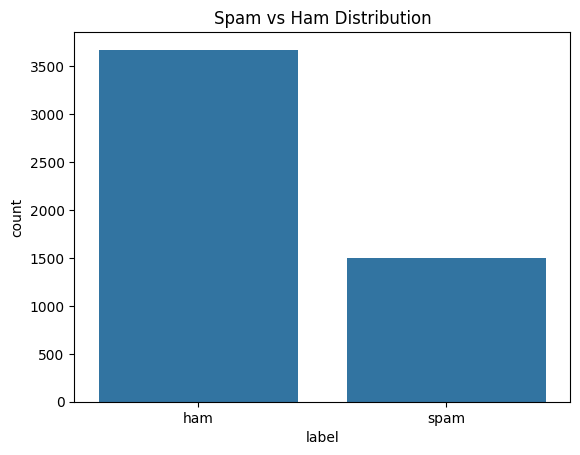

In [23]:
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

In [24]:
import re
def clean_text(text):
  text = text.lower()
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"[^a-z\s]", "", text)
  return text

df['clean_text'] = df['text'].apply(clean_text)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)

df.head()

,Unnamed: 0,label,text,label_num,clean_text,word_count,char_count
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter \r\nthis is a ...,49,302
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january \r\n see attache...,12,80
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat\r\nho ho ho we re aroun...,460,2428
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap mai...,44,409
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs\r\nthis deal is to ...,64,329


In [25]:
from collections import Counter

all_words = " ".join(df['clean_text']).split()
common_words = Counter(all_words).most_common(20)
common_words

[('the', 25613),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('for', 10505),
 ('of', 10167),
 ('a', 9813),
 ('you', 8159),
 ('subject', 8060),
 ('in', 7699),
 ('on', 7308),
 ('hou', 7289),
 ('is', 7162),
 ('this', 7161),
 ('enron', 6555),
 ('i', 6379),
 ('be', 5060),
 ('that', 4767),
 ('we', 4339),
 ('from', 4191)]

In [26]:
spam_words = " ".join(df[df['label']=="spam"]['clean_text']).split()
ham_words = " ".join(df[df['label']=="ham"]['clean_text']).split()
print("Spam words most common \n\n", Counter(spam_words).most_common(15))
print("\nNot Spam common words \n", Counter(ham_words).most_common(15))

Spam words most common 

 [('the', 7254), ('to', 5160), ('and', 4903), ('of', 4490), ('a', 3787), ('in', 3129), ('you', 2794), ('for', 2523), ('this', 2283), ('is', 2256), ('your', 1946), ('subject', 1657), ('with', 1470), ('that', 1348), ('s', 1316)]

Not Spam common words 
 [('the', 18359), ('to', 15172), ('ect', 13897), ('for', 7982), ('and', 7912), ('hou', 7281), ('enron', 6555), ('subject', 6403), ('on', 6049), ('a', 6026), ('of', 5677), ('you', 5365), ('i', 5241), ('is', 4906), ('this', 4878)]


In [27]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num', 'clean_text', 'word_count',
       'char_count'],
      dtype='object')

In [28]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_text = vectorizer.fit_transform(df['clean_text'])
y = df['label_num']

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_scores, p_values = chi2(X_text, y)

In [33]:
chi2_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'chi2_score': chi2_scores,
    'p_value': p_values
})

chi2_df = chi2_df.sort_values(by='chi2_score', ascending=False)

chi2_df.head(15)

,word,chi2_score,p_value
1447,ect,120.299194,5.440422e-28
2203,http,103.009438,3.335553e-24
1539,enron,90.682972,1.686383e-21
2187,hpl,77.925914,1.069787e-18
4967,xls,70.555826,4.474242e-17
2179,hou,65.285626,6.479222e-16
4956,www,60.633799,6.874349e-15
1163,deal,54.796253,1.336954e-13
2888,meter,52.872480,3.559216e-13
3174,online,51.076549,8.883323e-13
